<a href="https://colab.research.google.com/github/FulISun/AI_ML-DL_Intermediate/blob/main/machine_learing/03_kmeans_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

cm2 = ListedColormap(['C1', 'C2'])
cm3 = ListedColormap(['C1', 'C2', 'C3'])

## scikit-learn을 이용한 K-means 클러스터링

- 주어진 데이터를 k개 집단으로 군집하는 방법
- 데이터가 집단을 이룬다고 할 때 그 집단의 중심점을 찾음
- 처음 중심점을 무작위로 잡고 데이터의 평균과 분류 작업을 반복적으로 시행

### 데이터 생성

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs([62, 48], random_state=2, shuffle=True, cluster_std=1.5)

In [ ]:
print(X.shape, y.shape)

(110, 2) (110,)


### 데이터 확인

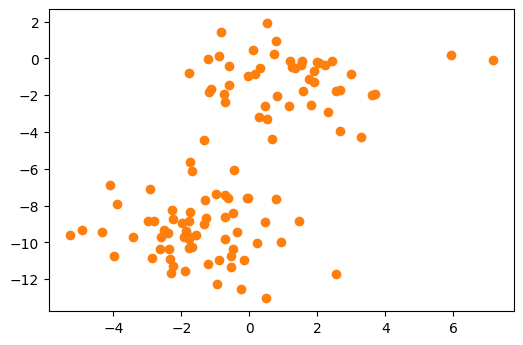

In [ ]:
fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(X[:,0], X[:,1], 'o', color='C1')

plt.show()

### 학습

- 다음과 같은 학습과정을 따름

  1. 클래스터 개수 $k$를 정한다.
  2. 무작위로 $k$개 점을 클러스터 중심 $c_k$로 선택한다.
  3. 선택된 중심 $k$개와 과 데이터간에 정의된 거리 $d(x_i, c_k)$를 구한다.
  4. $\hat{k} = \text{argmin}_{k} \, d(x_i, c_k)$인 $k$를 클러스터에 $x_i$를 할당한다.
  5. 클러스터링 된 $x_i$의 평균 $k$개를 구하여 $c_k$를 업데이트하고 3으로 가서 반복한다.

- 과정 4에서 클러스터링 결과는 다음과 같은 어레이에 저장한다.

$$
R_{nk} = \begin{bmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1
\end{bmatrix}
$$

- 위 어레이는 각 행이 데이터 하나에 해당되고 $k$열을 가지면 특정 열에만 1이 기록된 행렬

  즉, 자기가 속한 클러스터는 1 아닌 곳은 0!! 행은 N개 데이터, 열은 클러스터 수 K.

In [ ]:
# 초기 중심점을 데이터 점 중에 하나로 선택
k = 2
u_k = X[np.random.choice(X.shape[0], k)]
print(u_k)

[[-1.76547206 -8.8457383 ]
 [-1.7823564  -0.79782005]]


In [ ]:
# 점진적으로 위 과정 반복

#다시 구한 중심점이 이전 중심점에 비해 많이 움직이지 않으면 멈춤. 즉, 일정한 톨레랑스를 준다

for i in range(10):
    # 클러스터를 표시할 행렬 (N,k)
    rnk = np.zeros( (X.shape[0], k) ) 

    # 모든 점에 대해서 클러스터 인덱스를 적어줌
    for n in range(X.shape[0]):
        x = X[n]

        if np.linalg.norm(x - u_k[0]) < np.linalg.norm(x - u_k[1]): # np.linalg.norm = L2norm (linalg리니어알제브라)
            rnk[n,0] = 1 # 0번째 중심이 1번째 중심보다 더 가까우면 k0=1 => [1,0]
        else:
            rnk[n,1] = 1

    # 평균점 다시 계산
    u_k[0] = X[rnk[:,0]==1].mean(axis=0)
    u_k[1] = X[rnk[:,1]==1].mean(axis=0)

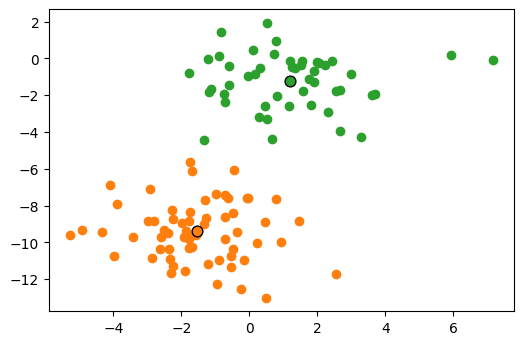

In [ ]:
# 결과 확인
fig = plt.figure(dpi = 100)
ax = plt.axes()

ax.plot(X[rnk[:,0]==1][:,0], X[rnk[:,0]==1][:,1], 'o', color='C1') # x축: X1, y축: X2 
ax.plot(X[rnk[:,1]==1][:,0], X[rnk[:,1]==1][:,1], 'o', color='C2') # x축: X1, y축: X2 

ax.scatter(u_k[0,0], u_k[0,1], s=60, color='C1', edgecolors='k', zorder=20)
ax.scatter(u_k[1,0], u_k[1,1], s=60, color='C2', edgecolors='k', zorder=20)

plt.show()

#### 학습 과정을 점진적으로 나타내기

[[ -3.97025533 -10.74409641]
 [  0.48019529 -12.99688015]]


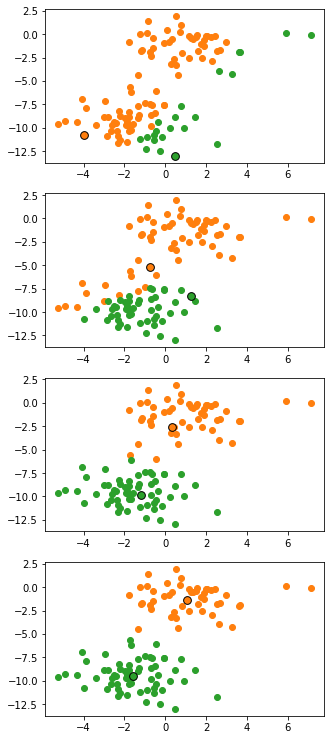

In [ ]:
# 초기 중심점을 데이터 점 중 하나로 선택
np.random.seed(10)

k = 2
u_k = X[np.random.choice(X.shape[0], k)] # (2,2)
print(u_k)

step = 4
fig, ax = plt.subplots(figsize=(5,13), nrows=step, ncols=1)

#---------------------------------------------#
for i in range(step):

    # 1. 선택된 중심점을 기준으로 클러스터링 하기
    rnk = np.zeros( (X.shape[0], k) )

    for n in range(X.shape[0]):
        x = X[n]
        if np.linalg.norm(x - u_k[0]) < np.linalg.norm(x - u_k[1]):
            rnk[n,0] = 1
        else:
            rnk[n,1] = 1

    # 2. ax[i]에 그림 그리기
    ax[i].plot( X[ rnk[:,0]==1 ][:,0], X[ rnk[:,0]==1 ][:,1], 'o', color='C1')
    ax[i].plot( X[ rnk[:,1]==1 ][:,0], X[ rnk[:,1]==1 ][:,1], 'o', color='C2')

    # 중심점
    ax[i].scatter(u_k[0,0], u_k[0,1], s=60, color='C1', edgecolor='k', zorder=20)
    ax[i].scatter(u_k[1,0], u_k[1,1], s=60, color='C2', edgecolor='k', zorder=20)

    # 3. 평균점 다시 계산
    u_k[0] = X[rnk[:,0]==1].mean(axis=0)
    u_k[1] = X[rnk[:,1]==1].mean(axis=0)

plt.show()

## sklean 이용

In [ ]:
# 모델 로드
from sklearn.cluster import KMeans

In [ ]:
# KMeans 객체 생성과 fit
k_clst = KMeans(n_clusters=2)
k_clst.fit(X)

KMeans(n_clusters=2)

In [ ]:
# 클러스터 중심점과 레이블 확인
print(k_clst.cluster_centers_)
print(k_clst.labels_)

[[ 1.18234983 -1.23822429]
 [-1.5448548  -9.40285804]]
[1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0
 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1
 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1]


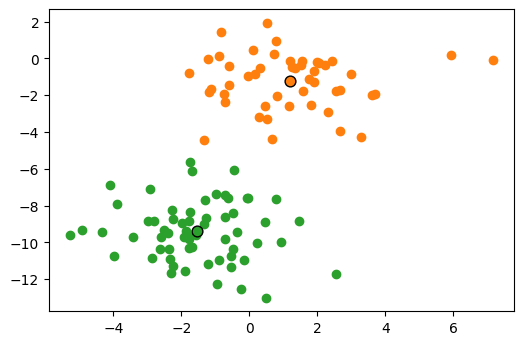

In [ ]:
# 결과 확인

fig = plt.figure(dpi=100)
ax = plt.axes()

# 레이블 인덱싱으로 점 찍기
ax.plot(X[k_clst.labels_ == 0][:,0], X[k_clst.labels_==0][:,1], 'o', color='C1')
ax.plot(X[k_clst.labels_ == 1][:,0], X[k_clst.labels_==1][:,1], 'o', color='C2')

# 중심점
ax.scatter(k_clst.cluster_centers_[0,0], k_clst.cluster_centers_[0,1], s=60, color='C1', edgecolor='k', zorder=20)
ax.scatter(k_clst.cluster_centers_[1,0], k_clst.cluster_centers_[1,1], s=60, color='C2', edgecolor='k', zorder=20)

plt.show()

## 주성분 분석 PCA(Principal Component Analysis)

- 주어진 데이터의 차원을 축소하는 알고리즘

- 데이터셋의 공분산 행렬을 구하고 그 행렬의 고유값, 고유벡터를 구해서 주성분 방향을 찾음

- 고유값이 작은 방향 성분을 선택적으로 삭제

- 고유값 고유벡터 확인
    - https://www.geogebra.org/m/JP2XZpzV


### 데이터 생성

In [ ]:
np.random.seed(0)

A = np.array([6,3,3,6]).reshape(2,2)
X = np.random.multivariate_normal([0,0], np.array([1,0,0,1]).reshape(2,2), 500) # multivariate_normal(mean, cov, size)
print(X.shape)

# Y = AX : 원래 데이터 X를 변환행렬 A로 변환 
Y = np.dot(A, X.T).T
print(Y.shape)

(500, 2)
(500, 2)


### 데이터 확인

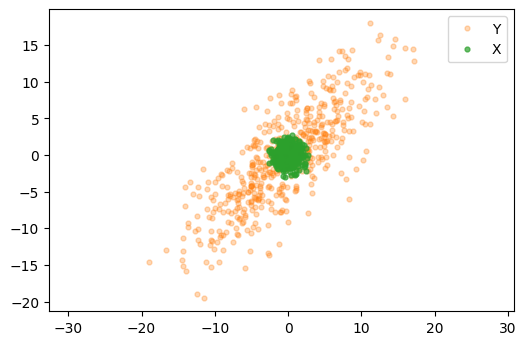

In [ ]:
fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(Y[:,0], Y[:,1], '.', color='C1', markersize=7, alpha=0.3, label='Y')
ax.plot(X[:,0], X[:,1], '.', color='C2', markersize=7, alpha=0.7, label='X')

ax.legend()
ax.axis('equal')

plt.show()

- 위 데이터는 동그랗게 모여있는 녹색 데이터를 일부러 2시, 7시 방향으로 퍼지게 만든 것임
- 녹색 데이터는 등방성, 다시 말해 x,y 축으로 퍼짐이 동등하고, 주황색 데이터는 분명히 변화가 심한 방향이 존재함
- 먼저 이 변화가 주로 일어나는 방향을 찾게 됨

### 학습

- Ax = $lambda$ x

  vector x에 행렬 A를 곱했는데 크기만 바뀐다면 그냥 x에 상수(lambda)를 곱한 것과 같음. 

  이 때 x: igen-vector, lambda: igen-value

- 방향성 있는(=타원으로 퍼진) 데이터의 공분산 행렬의 고유벡터를 구하면 고유벡터와 거의 비슷함.
- 주축은 데이터가 흩어져 있을 때 데이터의 변동을 가장 잘 설명하는 축임.
- 최초 데이터로부터 cov로부터 축 두개 구해서 주축 방향으로 데이터를 압축 시켜야 하는데, 계산을 편하게 구하기 위해서 축을 x축 방향으로 회전 시켜서(주축 회전) y절편을 0으로 만듦. 즉, 좌표가 (x,0)이 됨! => 숫자 하나로 줄여짐!! => 주축 변환과 차원 축소!!!
- y'=P'y 하면 변환됨 (cov의 고유벡터 * y)

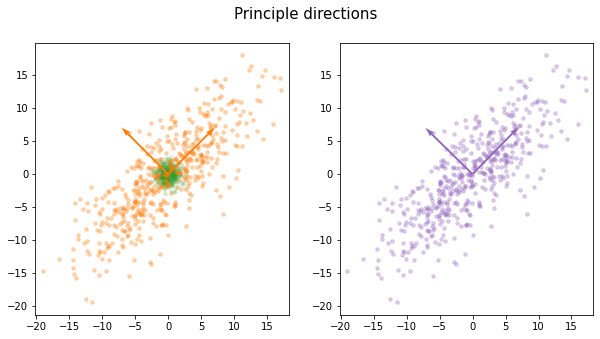

변환 행렬
[[6 3]
 [3 6]]
변환 행렬의 고유값 : 9.000000,3.000000
변환 행렬의 고유벡터
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


변환 데이터의 공분산 행렬
[[42.83742878 34.66774988]
 [34.66774988 44.24629644]]
공분산 행렬의 고유값
[78.21676865  8.86695657]
공분산 행렬의 고유벡터
[[ 0.69988736 -0.71425324]
 [ 0.71425324  0.69988736]]


In [ ]:
# 변환행렬 A의 고유값, 고유벡터
A_eig_val, A_eig_vec = np.linalg.eig(A) # 선형대수에서 아이겐밸류 아이겐벡터 구하는 함수
A_lamda1 = A_eig_val[0]
A_x1 = A_eig_vec[:,0]
A_lamda2 = A_eig_val[1]
A_x2 = A_eig_vec[:,1]

# 변환 후 데이터 Y의 공분산 행렬
COV = np.cov(Y.T)

# 공분산 행렬의 고유값과 고유벡터
COV_eig_val, COV_eig_vec = np.linalg.eig(COV) # 공분산 행렬의 고유값, 고유벡터 추출
COV_eig_val = COV_eig_val[[1,0]] # 큰 고유값을 0번에 놓기 위해 위치 바꾸기
COV_eig_vec = COV_eig_vec[:,[1,0]] # 연관되는 고유벡터도 같이 바꾸기
COV_eig_vec[:,0] *= -1 # 큰 고유값에 해당하는 고유벡터 방향 바꾸기

COV_lambda1 = COV_eig_val[0]
COV_x1 = COV_eig_vec[:,0]
COV_lambda2 = COV_eig_val[1]
COV_x2 = COV_eig_vec[:,1]

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(X[:,0], X[:,1], '.',  color='C2', markersize=7, alpha=0.1)
ax1.plot(Y[:,0], Y[:,1], '.',  color='C1', markersize=7, alpha=0.3)
ax1.quiver(0, 0, *A_x1, angles='xy', color='C1', scale_units='xy', scale=0.1, zorder=5)
ax1.quiver(0, 0, *A_x2, angles='xy', color='C1', scale_units='xy', scale=0.1, zorder=5)
ax1.axis('equal')

ax2.plot(Y[:,0], Y[:,1], '.',  color='C4', markersize=7, alpha=0.3)
ax2.quiver(0, 0, *COV_x1, angles='xy', color='C4',scale_units='xy', scale=0.1, zorder=5)
ax2.quiver(0, 0, *COV_x2, angles='xy', color='C4',scale_units='xy', scale=0.1, zorder=5)
ax2.axis('equal')

plt.suptitle("Principle directions", fontsize=15)
plt.show()

print("변환 행렬");                   print(A)
print("변환 행렬의 고유값 : {:f},{:f}".format( A_lamda1,  A_lamda2));
print("변환 행렬의 고유벡터");        print(A_eig_vec);  print("\n")
print("변환 데이터의 공분산 행렬");   print(COV)
print("공분산 행렬의 고유값");        print(COV_eig_val)
print("공분산 행렬의 고유벡터");      print(COV_eig_vec)

공분산 행렬의 고유벡터와 변환행렬의 고유벡터 값이 비슷함을 알 수 있음

공분산 행렬                                                  
var(x) cov(x,y)                                          

cov(x,y) var(y)

In [ ]:
# 공분산 행렬 만들기
print(f"var(x)={Y[:,0].var(ddof=1):.8f}")
print(f"var(y)={Y[:,1].var(ddof=1):.8f}")

# 공분산 항 sum((x-x')*(y-y')) / (n-1) => 샘플이니까 n-1
print(f"var(xy)={((Y[:,0]-Y[:,0].mean())*(Y[:,1]-Y[:,1].mean())).sum() / (Y.shape[0]-1):.8f}")

var(x)=42.83742878
var(y)=44.24629644
var(xy)=34.66774988


- 공분산 행렬의 두 고유벡터로 구해진 주성분 방향 중 분산이 작은 쪽의 차원을 버림
- 그 과정은 주성분 방향을 x,y축에 정렬하고 y값을 삭제

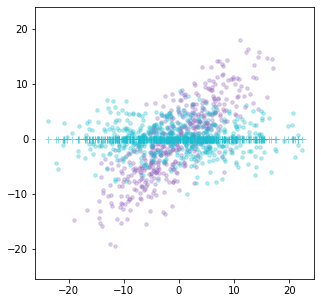

In [ ]:
# y'=P'y 하면 주축 변환됨   (Y'은 변환시킨 주축 (ppt에 돌아간 빨간 선)
# (500,2) =        (2,2)        (2,500)
Y_prime = np.dot(COV_eig_vec.T, Y.T).T
Y_prime_rdc = Y_prime.copy()

# 고유값 8.86에 해당하는 값을 0으로 만들어 차원을 줄임 => 즉 분산이 작은 쪽 차원 버림
Y_prime_rdc[:,1] = 0.0 # y좌표 축을 0으로

fig = plt.figure(figsize=(5,5))
ax = plt.axes()

ax.plot(Y[:,0], Y[:,1], '.',  color='C4', markersize=7, alpha=0.3)
ax.plot(Y_prime[:,0], Y_prime[:,1], '.',  color='C9', markersize=7, alpha=0.3)
ax.plot(Y_prime_rdc[:,0], Y_prime_rdc[:,1], '+',  color='C9', markersize=7, alpha=0.5)
ax.axis('equal')
plt.show()

# y절편을 0으로 만듦 => (x,0)이되어서 좌표가 숫자 하나로 줄어듦 => 주축 변환과 차원 축소!!!

- 다시 주성분 방향이 있던 방향으로 되돌리면 10시 4시 방향의 변화 성분들은 삭제됨

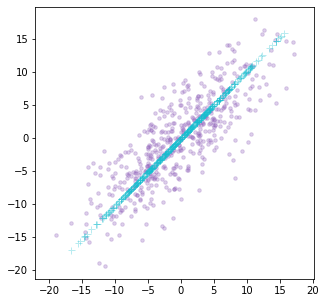

In [ ]:
# 역변환을 통해 원래 차원으로 돌리기
Y_2prime = np.linalg.solve(COV_eig_vec.T, Y_prime_rdc.T).T # 굳이 역행렬 안 구하고 linear solve.. 일차방정식

# 고유벡터로 구성된 행렬은 직교행렬(orthogonal mat)이므로 그냥 전치시키면 역행렬이 됨!! 
# Y_2prime = np.dot(COV_eig_vec, Y_prime_rdc.T).T   <= 이거 써도 돼!!

fig = plt.figure(figsize=(5,5))
ax = plt.axes()
ax.plot(Y[:,0], Y[:,1], '.',  color='C4', markersize=7, alpha=0.3)
ax.plot(Y_2prime[:,0], Y_2prime[:,1], '+',  color='C9', markersize=7, alpha=0.3)
ax.axis('equal')
plt.show()

### sklearn 이용

In [ ]:
# 모델 로드
from sklearn.decomposition import PCA

In [ ]:
# 모델 생성과 fit
pca = PCA(n_components=1) # 데이터가 몇 개의 component(성분)를 가지게 할 지.. 
Y_rdc = pca.fit_transform(Y)  # 원래 데이터인 보라색에 핏
print(Y_rdc.shape) # (500, 1) => x좌표값만 가진 애 (즉 Y=0)

Y_rcv = pca.inverse_transform(Y_rdc) # 복원
print(Y_rcv.shape)

(500, 1)
(500, 2)


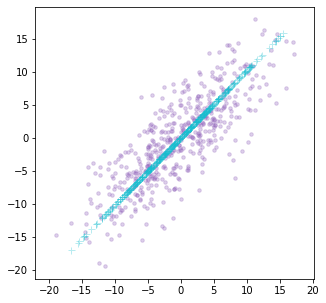

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()

ax.plot(Y[:,0], Y[:,1], '.',  color='C4', markersize=7, alpha=0.3)
ax.plot(Y_rcv[:,0], Y_rcv[:,1], '+',  color='C9', markersize=7, alpha=0.3)
ax.axis('equal')
plt.show()

## 실습: spiderman data에 적용

### k-means

- 아래 로드된 사진의 픽셀값을 k-means 클러스터링

- $k=5$로 해서 클러스터링하고 원본 사진과 비교

In [ ]:
# 이미지 다운로드
!gdown 1DGynaqyWzGi-T05IgQojIULUSoiHMkER

Downloading...
From: https://drive.google.com/uc?id=1DGynaqyWzGi-T05IgQojIULUSoiHMkER
To: /content/spiderman.jpg
100% 208k/208k [00:00<00:00, 95.2MB/s]


In [ ]:
import matplotlib as mpl
from mpl_toolkits import mplot3d

(187727, 3)
uint8


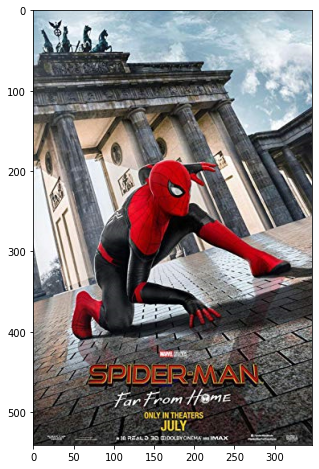

In [ ]:
img = mpl.image.imread('spiderman.jpg')
X = img.copy().reshape(-1,3) # 행이 픽셀 수가 되고 열이 rgb 세개가 됨
print(X.shape)
print(X.dtype)
fig = plt.figure(figsize=(5,10))
plt.imshow(img)
plt.show()

- 187,727개 픽셀로 이루어진 0~255값을 가지는 RGB 채널 이미지임
- R, G, B를 축으로 하는 색공간에 점들을 3000개만 뿌려보기

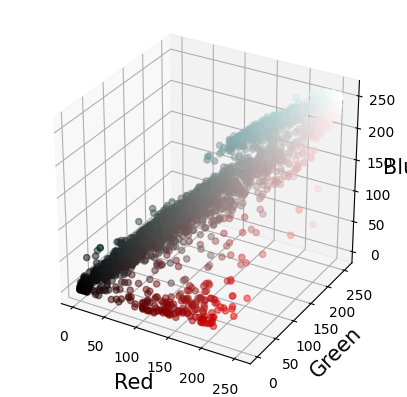

In [ ]:
idx = np.random.choice(X.shape[0], 3000) # 3000개 인덱스 무작위 추출

fig = plt.figure(figsize=(5,5), dpi=100)
ax = plt.axes(projection='3d')

ax.scatter(X[idx,0], X[idx,1], X[idx,2], '.', alpha=0.5, # X[idx,0], X[idx,1], X[idx,2] = R, G, B
           color=np.c_[X[idx,0]/255. , X[idx,1]/255. , X[idx,1]/255. ]) # 0,1,2를 255로 나눠서 점 하나하나당 색 지정 (정규화)

ax.set_xlabel('Red',   fontsize=15)
ax.set_ylabel('Green', fontsize=15)
ax.set_zlabel('Blue',  fontsize=15)

plt.show()

In [ ]:
# 클러스터 5개로 즉. 5색으로 픽셀을 묶음
k, d = 5, 3

# 앞에서 임포트한 KMeans모델을 생성하고 fit
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

labels = kmeans.labels_
u_k_sk = kmeans.cluster_centers_

In [ ]:
# sklearn에 의해 계산된 중심점 확인
print(u_k_sk)

[[ 95.25452971  92.84934747  91.93206487]
 [218.72831558 223.64506028 226.2702505 ]
 [ 39.73354358  36.02899258  36.02071645]
 [165.25252342 168.29100392 168.67329199]
 [164.79606545  15.99113751  21.71834827]]


In [ ]:
# 레이블 확인 (즉, 각각의 데이터가 몇 번째 클러스터에 속해있는지!)
# => N개 점에 대한 클러스터 j=(0,1,2,3,4)
print(labels)
print(labels.shape)

[3 3 3 ... 2 2 2]
(187727,)


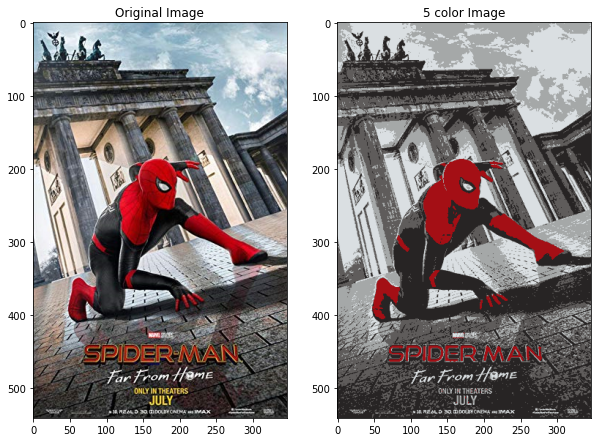

In [ ]:
#-----------------------------------------------------#
# 클러스터링 확인
#-----------------------------------------------------#

X_sk = X.copy() # sklearn으로 찾은 중심점으로 바꿀 이미지

#-----------------------------------------------------#
# X_sk는 (N,3)인 이미지의 포인트가 담긴 배열
# labels는 N개 점에 대한 클러스터 j (0,1,2,3,4)가 담겨있음 
# labes이 j번으로 기록된 X_sk의 포인트에 대해서 그 값을 u_k_sk[j]로 바꾸기!
for j in range(k):
    X_sk[ labels==j ] = u_k_sk[j]

fig, ax = plt.subplots(figsize=(10,20), nrows=1, ncols=2)

ax[0].imshow(img)
ax[0].set_title("Original Image")

ax[1].imshow(X_sk.reshape(img.shape))
ax[1].set_title(f"{k} color Image")
plt.show()


In [ ]:
X_sk = X.copy()
X_sk[labels]

array([[152, 185, 204],
       [152, 185, 204],
       [152, 185, 204],
       ...,
       [151, 184, 203],
       [151, 184, 203],
       [151, 184, 203]], dtype=uint8)

In [ ]:
X_sk[labels==4].shape

(10268, 3)

## 실습: Mnist data에 적용

### PCA

- 아래 로드된 Mnist 데이터셋에 PCA 적용
- 차원축소를 하고 분류 알고리즘 적용하여 분류하기
- 원 데이터를 쓴 경우와 차원축소된 데이터 쓴 경우 비교

In [ ]:
def digits_10(samples):
    """
    samples:(10,784), Mnist 숫자 10개

    출력은 (2,5)로 숫자가 배열된 숫자 이미지
    """
    samples2 = samples.reshape(10, 28, 28).transpose(1,0,2).reshape(28,-1)\
    .reshape(28,1,-1).reshape(28,-1,140).transpose(1,0,2).reshape(-1,140)

    fig = plt.figure(figsize=(10,5))
    ax = plt.axes()
    ax.imshow(samples2, cmap='binary')
    plt.show()

(20000, 784) (20000,)


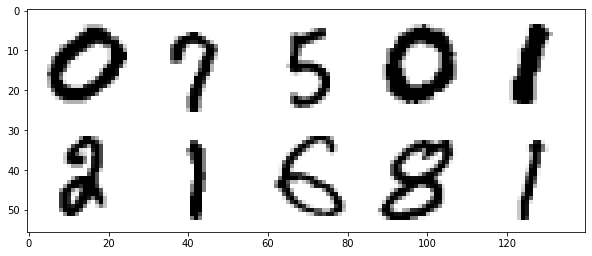

In [ ]:
np.random.seed(10)

mnist = pd.read_csv("sample_data/mnist_train_small.csv", header=None)

X = mnist.iloc[:,1:].to_numpy()
y = mnist.iloc[:,0].to_numpy()

print(X.shape, y.shape)
idx = np.random.choice(X.shape[0], 10)
samples = X[idx]

digits_10(samples)

# 20000개의 타겟, 784개의 피처 있음

In [ ]:
# PCA 수행하고 복원하기
pca = PCA(n_components=126)
X_rdc = pca.fit_transform(X)
print(X_rdc.shape)

X_rcv = pca.inverse_transform(X_rdc)
print(X_rcv.shape)

(20000, 126)
(20000, 784)


In [ ]:
print(f"원본 데이터 사이즈: {X.nbytes:12,}bytes")
print(f"PCA 데이터 사이즈: {X_rdc.nbytes:12,}bytes")
print(f"복원 데이터 사이즈: {X_rcv.nbytes:12,}bytes")

원본 데이터 사이즈:  125,440,000bytes
PCA 데이터 사이즈:   20,160,000bytes
복원 데이터 사이즈:  125,440,000bytes


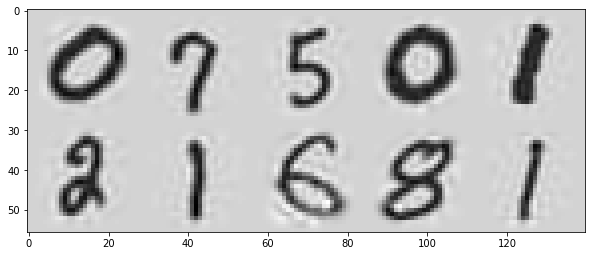

In [ ]:
# 복원 이미지 확인
samples = X_rcv[idx]
digits_10(samples)

- 126으로 줄인 걸로는 그림을 못 그림.. 그림이 28*28이라..
- 그림이 잘 복원되는 걸 보니 126은 정보를 잘 가지고 있는 애들임! 만약에 정보를 잘 가지고 있지 않다면 그림이 깨끗하게 복원되지 않을 것임

- component를 줄일수록 정보양이 줄어서 그림이 잘 복원되지 않음.

In [ ]:
# X와 X_rdc로 분류 알고리즘 적용하기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66) # 원데이터 스플릿
X_rdc_train, X_rdc_test, y_rdc_train, y_rdc_test = train_test_split(X_rdc, y, random_state=66) # 리듀스 데이터 스플릿

In [ ]:
# 분류 모델 이용하여 분류하기

from sklearn.linear_model import LogisticRegression

In [ ]:
# X_train, X_rdc_train에 각각 모델 학습
logreg = LogisticRegression(C=100, max_iter=500).fit(X_train, y_train)
# max_iter는 알고리즘 돌아가는 반복 수, C=100으로 규제 풀어줌
logreg_rdc = LogisticRegression(C=100, max_iter=500).fit(X_rdc_train, y_rdc_train)

# 리듀스 모델이 피처가 적으므로 돌아가는 시간은 더 빠를 것임.

# warning은 max=500으로 수렴 못했단 뜻임. 근데 그래도 학습은 됐을테니까 걍 해

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# 두 모델에 대해서 성능 확인하기
print(f"원본(학습): {logreg.score(X_train, y_train):.2f}")
print(f"원본(테스트): {logreg.score(X_test, y_test):.2f}")
print(f"축소(학습): {logreg_rdc.score(X_rdc_train, y_rdc_train):.2f}")
print(f"축소(테스트): {logreg_rdc.score(X_rdc_test, y_rdc_test):.2f}") # 피처 많은 원본보다 테스트 성능이 좋음

원본(학습): 0.99
원본(테스트): 0.86
축소(학습): 0.93
축소(테스트): 0.91


- 학습 데이터에 피처가 많으면 오버피팅 된다! => 따라서 쓸데없는 피처를 줄이는 것 => 피처 셀렉션

- 그런데 어떤 피처를 줄일 것인가에 대한 논쟁이 있으므로
머신러닝 측면에서 PCA보다는 regularization(규제)이 더 좋다고 생각함. 즉, 하이퍼파라미터 조정이 낫다!

In [ ]:
# 규제를 통한 모형
logreg = LogisticRegression(C=0.0001, max_iter=500).fit(X_train, y_train)
logreg_rdc = LogisticRegression(C=100, max_iter=500).fit(X_rdc_train, y_rdc_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# 두 모델에 대해서 train, test에 대해서 성능 확인하기
print(f"원본 학습: {logreg.score(X_train, y_train):.2f}")
print(f"원본 테스트: {logreg.score(X_test, y_test):.2f}") #하이퍼파라미터 조정만으로도 꽤 비슷한 성능을 가짐
print(f"축소 학습: {logreg_rdc.score(X_rdc_train, y_rdc_train):.2f}")
print(f"축소 테스트: {logreg_rdc.score(X_rdc_test, y_rdc_test):.2f}") 

원본 학습: 0.97
원본 테스트: 0.89
축소 학습: 0.93
축소 테스트: 0.91
